In [17]:
!pip install torch torchvision torchaudio --quiet
!pip install opencv-python pillow scikit-learn pandas matplotlib tqdm kaggle --quiet

import torch
print(" GPU available:", torch.cuda.is_available())


 GPU available: True


In [18]:
import os
import zipfile

# --- Setup Kaggle API Key ---
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# --- Download and unzip Kaggle dataset ---
print("Downloading first dataset (Skin Issues v2)...")
!kaggle datasets download -d ahmedismaiil/skin-issues-version-2-dataset-balanced
!unzip -q -o skin-issues-version-2-dataset-balanced.zip -d skin_issues_v2
print("First dataset ready at: skin_issues_v2/")
!ls skin_issues_v2

# --- Unzip Roboflow dataset from your uploaded file ---
rf_zip_path = "/content/skincare.v7i.folder.zip"

with zipfile.ZipFile(rf_zip_path, 'r') as zip_ref:
    zip_ref.extractall("skin_issues_rf")

print("Roboflow dataset ready at: skin_issues_rf/")
!ls skin_issues_rf


mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ahmedismaiil/skin-issues-version-2-dataset-balanced
License(s): unknown
skin-issues-version-2-dataset-balanced.zip: Skipping, found more recently modified local copy (use --force to force download)
First dataset ready at: skin_issues_v2/
'Skin v2'
Roboflow dataset ready at: skin_issues_rf/
README.dataset.txt  README.roboflow.txt  test  train  valid


In [19]:
import os
import zipfile

# --- Check Kaggle dataset folder ---
print("First dataset (Skin Issues v2) ready at: skin_issues_v2/")
!ls skin_issues_v2

# --- Unzip Roboflow dataset from your local file (if not already unzipped) ---
rf_zip_path = "/content/skincare.v7i.folder.zip"

if not os.path.exists("skin_issues_rf"):
    with zipfile.ZipFile(rf_zip_path, 'r') as zip_ref:
        zip_ref.extractall("skin_issues_rf")

print("Roboflow dataset ready at: skin_issues_rf/")
!ls skin_issues_rf


First dataset (Skin Issues v2) ready at: skin_issues_v2/
'Skin v2'
Roboflow dataset ready at: skin_issues_rf/
README.dataset.txt  README.roboflow.txt  test  train  valid


In [20]:
import os
import glob
import shutil
import random
import zipfile

# -------------------------------
# Step 1: Setup Kaggle API Key
# -------------------------------
os.makedirs('/root/.kaggle', exist_ok=True)
!mv "kaggle.json" /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# -------------------------------
# Step 2: Download Kaggle Dataset
# -------------------------------
print("Downloading first dataset (Skin Issues v2)...")
!kaggle datasets download -d ahmedismaiil/skin-issues-version-2-dataset-balanced
!unzip -q -o skin-issues-version-2-dataset-balanced.zip -d skin_issues_v2
print("First dataset ready at: skin_issues_v2/")
!ls skin_issues_v2

# -------------------------------
# Step 3: Unzip Roboflow dataset (already uploaded)
# -------------------------------
rf_zip_path = "/content/skincare.v7i.folder.zip"

with zipfile.ZipFile(rf_zip_path, 'r') as zip_ref:
    zip_ref.extractall("skin_issues_rf")

print("Roboflow dataset ready at: skin_issues_rf/")
!ls skin_issues_rf

# -------------------------------
# Step 4: Define 10-category mapping
# -------------------------------
roboflow_to_new = {
    'Acne': 'acne',
    'Acne Blackheads': 'acne',
    'Acne Wrinkles': 'acne',
    'Acne Dark-Spots': 'acne',
    'Acne Dry-Skin': 'acne',
    'Acne Englarged-Pores': 'acne',
    'Blackheads': 'blackheads',
    'Blackheads Whiteheads': 'blackheads',
    'Dark-Spots': 'dark spots',
    'Englarged-Pores': 'pores',
    'Wrinkles': 'wrinkles',
    'Oily-Skin': 'oily skin',
    'Dry-Skin': 'dry skin',
    'Whiteheads': 'whiteheads',
    'Eyebags': 'eyebags',
    'Skin-Redness': 'skin redness',
    # Add other combinations as needed
}

# -------------------------------
# Step 5: Combine both datasets into a single folder
# -------------------------------
combined_dir = "combined_dataset"
train_dir = os.path.join(combined_dir, "train")
val_dir = os.path.join(combined_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

def copy_and_map(src_dir, dst_train_dir, dst_val_dir, mapping=None):
    """
    Copies images from src_dir to train/val folders using mapping dictionary if provided.
    Splits 80% train, 20% val.
    """
    for subfolder in os.listdir(src_dir):
        src_subfolder = os.path.join(src_dir, subfolder)
        if not os.path.isdir(src_subfolder):
            continue

        # Map folder name if mapping is provided
        if mapping:
            dst_class = mapping.get(subfolder, None)
            if dst_class is None:
                continue  # skip unrecognized category
        else:
            dst_class = subfolder  # keep original name for Kaggle dataset

        # Create train/val folders
        os.makedirs(os.path.join(dst_train_dir, dst_class), exist_ok=True)
        os.makedirs(os.path.join(dst_val_dir, dst_class), exist_ok=True)

        # Get images and shuffle
        images = glob.glob(os.path.join(src_subfolder, '*'))
        random.shuffle(images)
        split_idx = int(0.8 * len(images))

        for i, img_path in enumerate(images):
            if i < split_idx:
                dst = os.path.join(dst_train_dir, dst_class, os.path.basename(img_path))
            else:
                dst = os.path.join(dst_val_dir, dst_class, os.path.basename(img_path))
            shutil.copy(img_path, dst)

# Copy Kaggle dataset (original 5 classes)
copy_and_map("skin_issues_v2/Skin v2", train_dir, val_dir)

# Copy Roboflow dataset (mapped to 10 classes)
copy_and_map("skin_issues_rf/train", train_dir, val_dir, mapping=roboflow_to_new)

print(" Combined dataset ready at:", combined_dir)
!ls combined_dataset/train

# From Kaggle (original 5): acne, blackheades, dark spots, pores, wrinkles
# From Roboflow (mapped to new 5): eyebags, oily skin, dry skin, whiteheads, skin redness


mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ahmedismaiil/skin-issues-version-2-dataset-balanced
License(s): unknown
skin-issues-version-2-dataset-balanced.zip: Skipping, found more recently modified local copy (use --force to force download)
First dataset ready at: skin_issues_v2/
'Skin v2'
Roboflow dataset ready at: skin_issues_rf/
README.dataset.txt  README.roboflow.txt  test  train  valid
 Combined dataset ready at: combined_dataset
 acne	       blackheads   'dry skin'	'oily skin'  'skin redness'   wrinkles
 blackheades  'dark spots'   eyebags	 pores	      whiteheads


In [21]:
import glob, shutil, random, os

# List of dataset roots
datasets = [
    "skin_issues_v2/Skin v2",   # Kaggle dataset
    "skin_issues_rf"            # Roboflow dataset
]

# Mapping to standardize category names
category_mapping = {
    "blackheades": "blackheads",
    "dry skin": "dry skin",
    "oily skin": "oily skin",
    "dark spots": "dark spots",
    "whiteheads": "whiteheads",
    "skin redness": "skin redness",
    "eyebags": "eyebags",
    "acne": "acne",
    "pores": "pores",
    "wrinkles": "wrinkles"
}

# Create train/val folders
os.makedirs("data/train", exist_ok=True)
os.makedirs("data/val", exist_ok=True)

# Iterate over both datasets
for base_dir in datasets:
    if not os.path.exists(base_dir):
        print(f" Path does not exist: {base_dir}")
        continue

    for c in os.listdir(base_dir):
        src = os.path.join(base_dir, c)
        if os.path.isdir(src):
            # Standardize category name
            c_std = category_mapping.get(c.lower().replace("-", " "), c.lower().replace("-", " "))

            # Recursively get all image files inside this category folder
            imgs = [f for f in glob.glob(f"{src}/**/*", recursive=True)
                    if f.lower().endswith((".jpg", ".jpeg", ".png"))]
            random.shuffle(imgs)
            split = int(0.8 * len(imgs))

            # Ensure train/val class folders exist
            os.makedirs(f"data/train/{c_std}", exist_ok=True)
            os.makedirs(f"data/val/{c_std}", exist_ok=True)

            # Copy images
            for i, img in enumerate(imgs):
                dst = f"data/train/{c_std}" if i < split else f"data/val/{c_std}"
                shutil.copy(img, dst)

print(" Train/Validation split complete for both datasets!")


 Train/Validation split complete for both datasets!


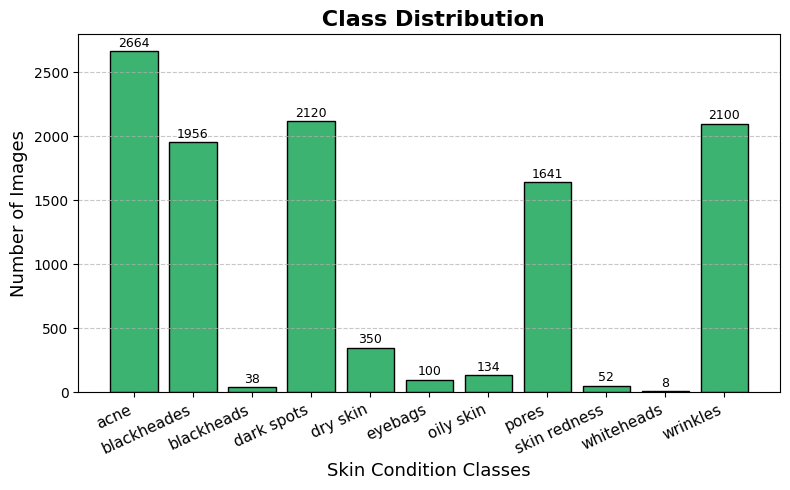

In [22]:
#  Combined Dataset Class Distribution Visualization
import matplotlib.pyplot as plt
import os

data_root = "combined_dataset/train"  # Path to combined train folder
classes = sorted(os.listdir(data_root))

# Count images in each class
counts = [len(os.listdir(os.path.join(data_root, c))) for c in classes]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(classes, counts, color="mediumseagreen", edgecolor="black")

# Add count labels above bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, count + 10, str(count),
             ha='center', va='bottom', fontsize=9, color='black')

plt.title(" Class Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Skin Condition Classes", fontsize=13)
plt.ylabel("Number of Images", fontsize=13)
plt.xticks(rotation=25, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from glob import glob

# -----------------------------
# Image transformations
# -----------------------------
train_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# -----------------------------
# Standardized 10 classes
# -----------------------------
final_classes = [
    "acne", "blackheads", "whiteheads", "dark spots", "pores",
    "wrinkles", "dry skin", "oily skin", "eyebags", "skin redness"
]

# Optional: mapping from raw folder names to final class
category_mapping = {
    "blackheades": "blackheads",
    "blackheads oily-skin": "blackheads",
    "acne": "acne",
    "acne dry-skin": "acne",
    "acne wrinkles": "acne",
    "acne blackheads": "acne",
    "dark spots": "dark spots",
    "whiteheads": "whiteheads",
    "pores": "pores",
    "wrinkles": "wrinkles",
    "dry-skin": "dry skin",
    "oily-skin": "oily skin",
    "eyebags": "eyebags",
    "skin-redness": "skin redness"
    # Add more mappings as needed
}

# -----------------------------
# Custom dataset class
# -----------------------------
class SkinDataset(Dataset):
    def __init__(self, folder, tfms):
        self.paths = [f for f in glob(folder + '/**/*', recursive=True)
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        self.tfms = tfms
        # Map folder names to final classes
        self.classes = final_classes
        self.label2idx = {c:i for i,c in enumerate(self.classes)}

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, i):
        p = self.paths[i]
        img = Image.open(p).convert('RGB')
        raw_label = os.path.basename(os.path.dirname(p)).lower().replace("-", " ")
        label = category_mapping.get(raw_label, raw_label)
        label_idx = self.label2idx[label]
        return self.tfms(img), label_idx

# -----------------------------
# Create datasets and DataLoaders
# -----------------------------
train_ds = SkinDataset("data/train", train_tfms)
val_ds   = SkinDataset("data/val", val_tfms)

train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl   = DataLoader(val_ds, batch_size=16)

# -----------------------------
# Summary
# -----------------------------
print(" Data ready for model training")
print("Classes:", train_ds.classes)
print("Train samples:", len(train_ds), "| Validation samples:", len(val_ds))


 Data ready for model training
Classes: ['acne', 'blackheads', 'whiteheads', 'dark spots', 'pores', 'wrinkles', 'dry skin', 'oily skin', 'eyebags', 'skin redness']
Train samples: 12109 | Validation samples: 7141


In [24]:
import os
import shutil
from torchvision import datasets, transforms, models
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# -----------------------------
# Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

# -----------------------------
# Device
# -----------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

# -----------------------------
# Paths
# -----------------------------
COMBINED_DIR = "combined_dataset"           # Combined train/val dataset
CHECKPOINT_PATH = "/content/drive/MyDrive/skin_issues_checkpoint.pth"  # Path to save checkpoint

# -----------------------------
# Step 1: Define transforms
# -----------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# -----------------------------
# Step 2: Load datasets
# -----------------------------
train_ds = datasets.ImageFolder(os.path.join(COMBINED_DIR, "train"), transform=transform)
val_ds   = datasets.ImageFolder(os.path.join(COMBINED_DIR, "val"), transform=transform)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl   = DataLoader(val_ds, batch_size=32)

print(f"Total classes: {len(train_ds.classes)}")
print(f"Classes: {train_ds.classes}")
print(f"Total training images: {len(train_ds)}")
print(f"Total validation images: {len(val_ds)}")

# -----------------------------
# Step 3: Load EfficientNet-B0
# -----------------------------
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(train_ds.classes))
model = model.to(device)

# -----------------------------
# Step 4: Optimizer and loss
# -----------------------------
opt = torch.optim.AdamW(model.parameters(), lr=3e-4)
loss_fn = nn.CrossEntropyLoss()

# -----------------------------
# Step 5: Resume from checkpoint if exists
# -----------------------------
start_epoch = 0
if os.path.exists(CHECKPOINT_PATH):
    print(f" Resuming from checkpoint: {CHECKPOINT_PATH}")
    checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)
    model.load_state_dict(checkpoint['model_state'])
    opt.load_state_dict(checkpoint['optimizer_state'])
    start_epoch = checkpoint['epoch'] + 1
else:
    print(" No checkpoint found, starting training from scratch!")

# -----------------------------
# Step 6: Training loop with checkpointing
# -----------------------------
EPOCHS = 3  # Reduce or increase as needed

for epoch in range(start_epoch, EPOCHS):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for x, y in tqdm(train_dl, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        x, y = x.to(device), y.to(device)

        opt.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        opt.step()

        running_loss += loss.item()
        correct += (out.argmax(1) == y).sum().item()
        total += y.size(0)

    train_acc = correct / total
    avg_loss = running_loss / len(train_dl)
    print(f"Epoch {epoch+1}/{EPOCHS}:  Train Acc = {train_acc:.3f}, Avg Loss = {avg_loss:.4f}")

    # Save checkpoint after each epoch
    torch.save({
        'epoch': epoch,
        'model_state': model.state_dict(),
        'optimizer_state': opt.state_dict()
    }, CHECKPOINT_PATH)
    print(f" Checkpoint saved at epoch {epoch+1}")

# -----------------------------
# Step 7: Save final model
# -----------------------------
FINAL_MODEL_PATH = "/content/drive/MyDrive/skin_issues_10class_model.pt"
torch.save(model.state_dict(), FINAL_MODEL_PATH)
print(f" Training complete! Final model saved at: {FINAL_MODEL_PATH}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Total classes: 11
Classes: ['acne', 'blackheades', 'blackheads', 'dark spots', 'dry skin', 'eyebags', 'oily skin', 'pores', 'skin redness', 'whiteheads', 'wrinkles']
Total training images: 11163
Total validation images: 5505
 Resuming from checkpoint: /content/drive/MyDrive/skin_issues_checkpoint.pth
 Training complete! Final model saved at: /content/drive/MyDrive/skin_issues_10class_model.pt


 Classification Report:

              precision    recall  f1-score   support

        acne       0.98      0.98      0.98      1308
 blackheades       0.97      0.97      0.97       960
  blackheads       0.71      0.63      0.67        19
  dark spots       0.99      0.98      0.99      1038
    dry skin       0.92      0.84      0.88       175
     eyebags       0.80      0.92      0.86        52
   oily skin       0.87      0.91      0.89        66
       pores       0.99      1.00      0.99       815
skin redness       0.87      1.00      0.93        26
  whiteheads       1.00      0.20      0.33         5
    wrinkles       0.98      0.99      0.99      1041

    accuracy                           0.98      5505
   macro avg       0.92      0.86      0.86      5505
weighted avg       0.98      0.98      0.98      5505



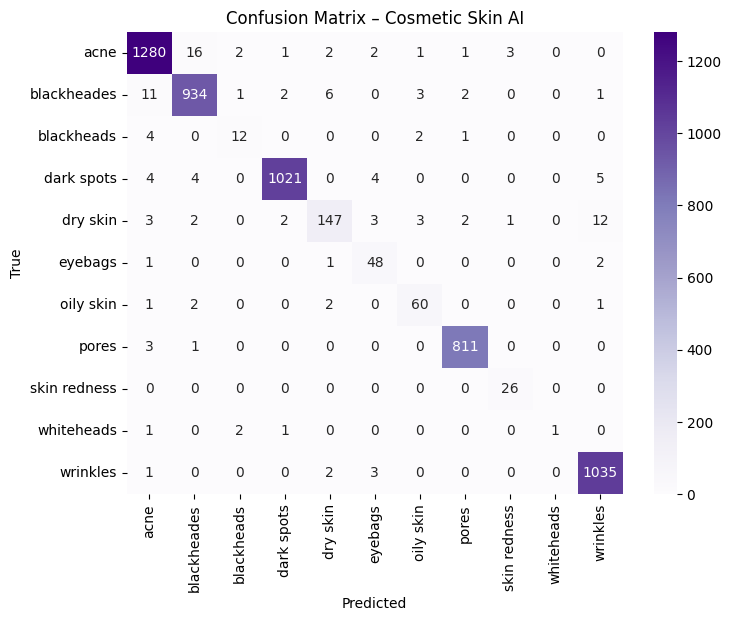

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Set the model to evaluation mode
model.eval()
preds, labels = [], []

#  Collect predictions and true labels
with torch.no_grad():
    for x, y in val_dl:   # use validation DataLoader
        x, y = x.to(device), y.to(device)
        out = model(x)
        preds += out.argmax(1).cpu().tolist()
        labels += y.cpu().tolist()

#  Print the classification report
print(" Classification Report:\n")
print(classification_report(labels, preds, target_names=val_ds.classes))

#  Plot the confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=val_ds.classes,
            yticklabels=val_ds.classes,
            cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Cosmetic Skin AI")
plt.show()


In [26]:
#  Skincare advice dictionary (updated for 10 classes)
def skincare_advice(pred_label):
    advice = {
        "acne": """• Use a gentle cleanser twice daily.
• Avoid touching your face frequently.
• Apply non-comedogenic moisturizer and light sunscreen daily.""",

        "blackheads": """• Exfoliate 2–3 times per week using salicylic acid or BHA products.
• Use clay or charcoal masks to keep pores clean.
• Avoid heavy oil-based creams or cosmetics.""",

        "dark spots": """• Apply sunscreen every day to prevent further pigmentation.
• Use brightening serums with vitamin C or niacinamide.
• Stay hydrated and avoid direct sunlight exposure.""",

        "pores": """• Cleanse regularly to prevent clogged pores.
• Use mild exfoliants or clay masks weekly.
• Avoid heavy makeup and always remove it before sleeping.""",

        "wrinkles": """• Use SPF daily to protect against UV damage.
• Apply moisturizers containing retinol, peptides, or hyaluronic acid.
• Maintain hydration and consistent sleep patterns.""",

        "dry skin": """• Use a rich moisturizer twice daily.
• Avoid harsh soaps and hot water.
• Hydrate internally by drinking enough water.""",

        "oily skin": """• Use a gentle foaming cleanser twice daily.
• Apply oil-free, non-comedogenic products.
• Blot excess oil with tissues or mattifying sheets.""",

        "eyebags": """• Get adequate sleep (7–8 hours nightly).
• Apply cooling eye gels or creams containing caffeine.
• Reduce salt intake and stay hydrated.""",

        "skin redness": """• Use fragrance-free, soothing moisturizers.
• Avoid hot water and harsh exfoliants.
• Apply sunscreen daily to prevent irritation.""",

        "whiteheads": """• Cleanse twice daily with a gentle, salicylic acid-based cleanser.
• Avoid squeezing or picking the whiteheads.
• Use light, non-comedogenic moisturizers."""
    }

    print(f"Detected Condition: {pred_label.capitalize()}\n")
    print("Recommended Cosmetic Care Tips:")
    print(advice.get(pred_label, "Maintain healthy skincare: cleanse, hydrate, and protect from sun."))


In [34]:
class_names = val_ds.classes  # or train_ds.classes if val_ds not defined yet


In [44]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch, numpy as np

# same normalization used in training
IMG_SIZE = 260
inference_tfms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

def predict_and_show(img_pil):
    """Predicts class for a PIL image and displays result."""
    model.eval()
    x = inference_tfms(img_pil).unsqueeze(0).to(device)
    with torch.no_grad():
        preds = model(x).softmax(1).cpu().numpy()[0]
    idx = preds.argmax()
    confidence = preds[idx]
    label = class_names[idx]

    # --- Show result ---
    plt.imshow(img_pil)
    plt.axis("off")
    plt.title(f"Predicted: {label} | Confidence: {confidence*100:.1f}%")
    plt.show()

    print("Detected Condition:", label)
    print("Confidence:", round(confidence*100, 2), "%")

    # Optional: simple skincare suggestions
    if label == "acne":
        print("\n Recommendation: Cleanse gently, avoid harsh scrubs, use non-comedogenic moisturizer.")
    elif label == "wrinkles":
        print("\n Recommendation: Use SPF, stay hydrated, and consider retinol-based creams.")
    elif label == "blackheads":
        print("\n Recommendation: Use a mild BHA exfoliant 2–3 times per week.")
    else:
        print("\n Recommendation: Maintain healthy skincare habits daily.")


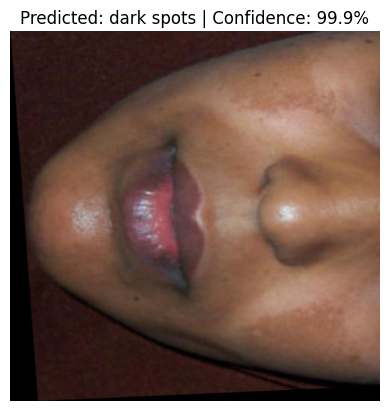

Detected Condition: dark spots
Confidence: 99.9 %

 Recommendation: Maintain healthy skincare habits daily.


In [45]:
# ---- Final Inference Block (Fixed for Colab) ----
# Option 1: Random image from validation set
def predict_random_val_image():
    sample_path, _ = random.choice(val_ds.samples)
    img = Image.open(sample_path).convert("RGB")
    predict_and_show(img)

# Option 2: Upload your own image
def predict_uploaded_image():
    uploaded = files.upload()
    for fname in uploaded.keys():
        img = Image.open(fname).convert("RGB")
        predict_and_show(img)

choice = "1"  # change to "2" if you want to upload
if choice == "1":
    predict_random_val_image()
elif choice == "2":
    predict_uploaded_image()
